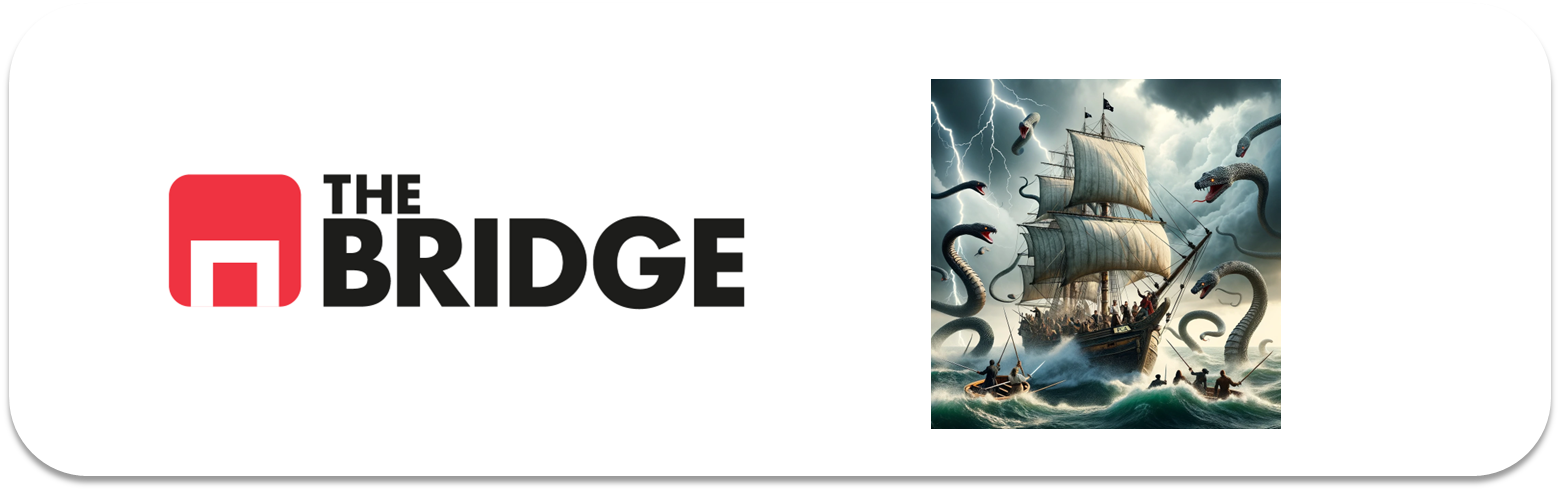

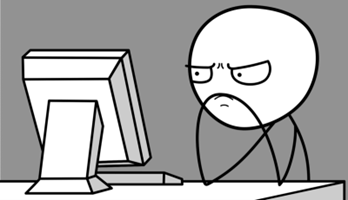

Para ejercitarte y afianzar lo aprendido sobre **Seleccion de Features**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

## Feature selection: Breast Cancer Winsconsin

El objetivo de este grupo de ejercicio es dar a entender la importancia de la selección de características (features), así como probar distintos métodos de reducción de características (features) y qué influencia puede tener el reducir features en el perfomance de un modelo. Nuestro target para evaluar el perfomance será si estamos ante tumores malignos o benignos.

Vamos a trabajar con el dataset de Breast Cancer Winsconsin, datos tomados a partir de radiografías.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from PIL import Image
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import urllib.request

### Ejercicio 1:

Carga los datos y haz una primera inspección de los mismos y comenta lo que creas conveniente sobre las features y su relación entre sí (pero sin analizarlas numéricamente)

In [4]:


import os

# Ruta del archivo
file_path = r"C:\Users\hp\Desktop\Python Scripts\breastcancer-winsconsin.csv"

# Verificar si el archivo existe antes de intentar cargarlo
if os.path.exists(file_path):
    # Cargar el dataset asegurando que los encabezados sean reconocidos correctamente
    df = pd.read_csv(file_path, delimiter=",", quotechar='"')

    # Mostrar las primeras filas para verificar que se cargó correctamente
    print(df.head())

    # Verificar la estructura del dataset
    print(df.info())
else:
    print(f"Error: El archivo no fue encontrado en la ruta {file_path}")


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

### Ejercicio 2:

Descarta las características que evidentemente no aportan información.

In [6]:


# Cargar el dataset asegurando que los encabezados sean reconocidos correctamente
file_path = r"C:\Users\hp\Desktop\Python Scripts\breastcancer-winsconsin.csv"
df = pd.read_csv(file_path, delimiter=",", quotechar='"')

# Eliminar columnas irrelevantes
columns_to_drop = ["id", "Unnamed: 32"]  # 'id' no aporta información y 'Unnamed: 32' es una columna vacía
df_cleaned = df.drop(columns=columns_to_drop, axis=1)

# Mostrar las primeras filas para verificar la limpieza
print(df_cleaned.head())

# Verificar la estructura del dataset después de la limpieza
print(df_cleaned.info())

# Guardar el dataset limpio si es necesario
df_cleaned.to_csv("breastcancer-wisconsin_cleaned.csv", index=False)


  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33 

### Ejercicio 3: 

Divide en train y test. Analiza el target de forma breve.

In [7]:

from sklearn.model_selection import train_test_split

# Cargar el dataset limpio
file_path = "breastcancer-wisconsin_cleaned.csv"
df = pd.read_csv(file_path)

# Analizar el target
print("Distribución de la variable objetivo (diagnosis):")
print(df["diagnosis"].value_counts(normalize=True))  # Proporción de cada clase
print(df["diagnosis"].value_counts())  # Conteo de cada clase

# Convertir la variable objetivo a formato numérico (opcional para algunos modelos)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})  # M = Maligno (1), B = Benigno (0)

# Separar features y target
X = df.drop(columns=["diagnosis"])  # Features
y = df["diagnosis"]  # Target

# División en Train (80%) y Test (20%) con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Verificar tamaños de los conjuntos
print(f"Tamaño de Train: {X_train.shape[0]} instancias")
print(f"Tamaño de Test: {X_test.shape[0]} instancias")

# Guardar los datasets separados si es necesario
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)


Distribución de la variable objetivo (diagnosis):
diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64
diagnosis
B    357
M    212
Name: count, dtype: int64
Tamaño de Train: 455 instancias
Tamaño de Test: 114 instancias


### Ejercicio 4: MiniEDA (I) Análisis Visual

Realiza un análisis visual de las features y haz tu selección de primera "división" (que luego usaremos para comparar con otros métodos de selección).

Columnas en el dataset: ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
La columna 'id' no está en el dataset, se omite su eliminación.


<Figure size 1500x1200 with 0 Axes>

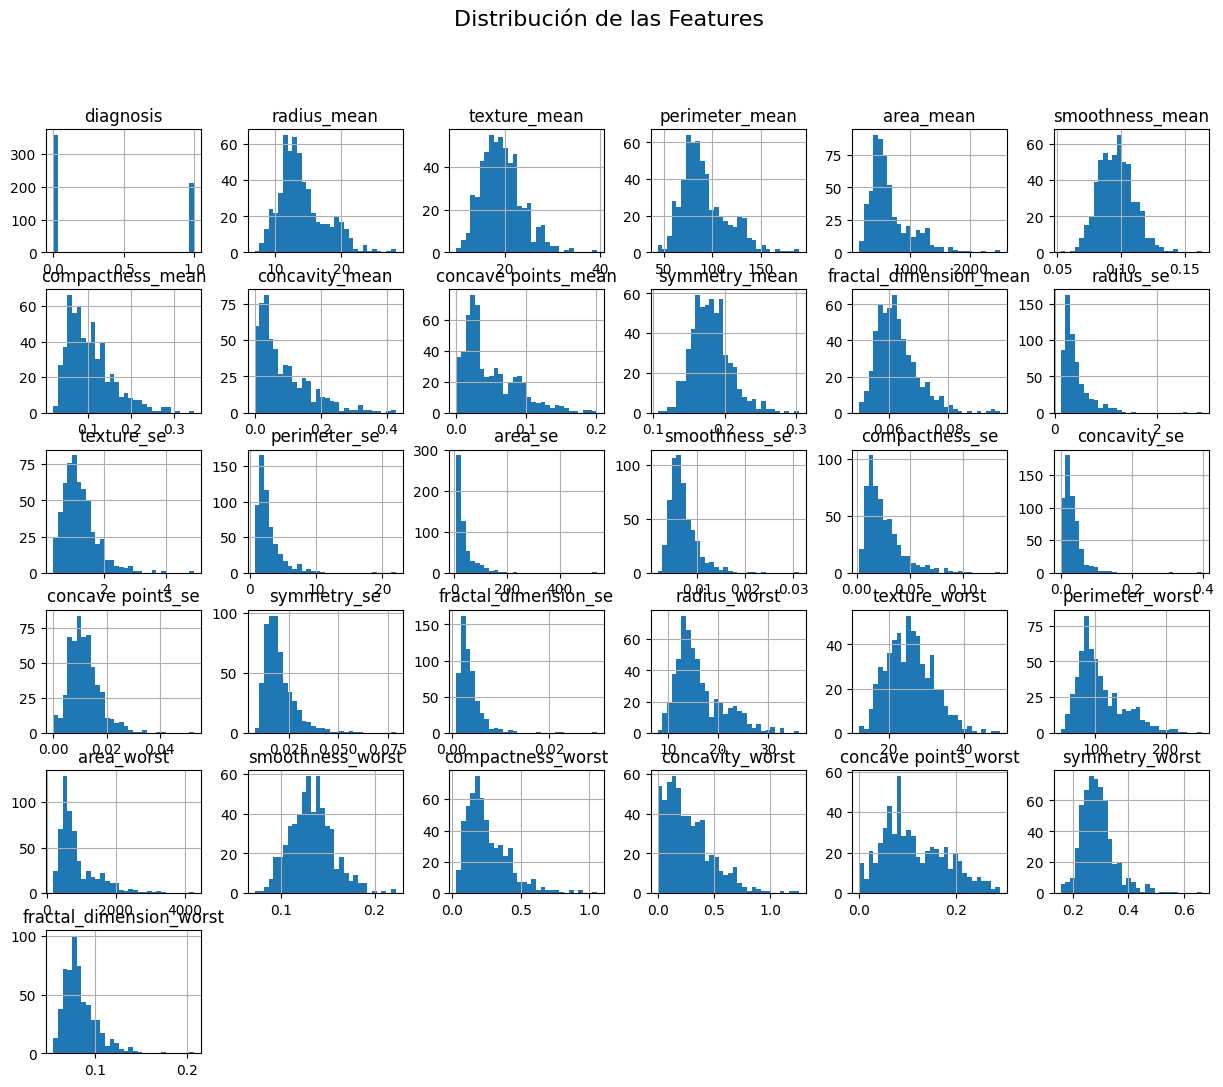

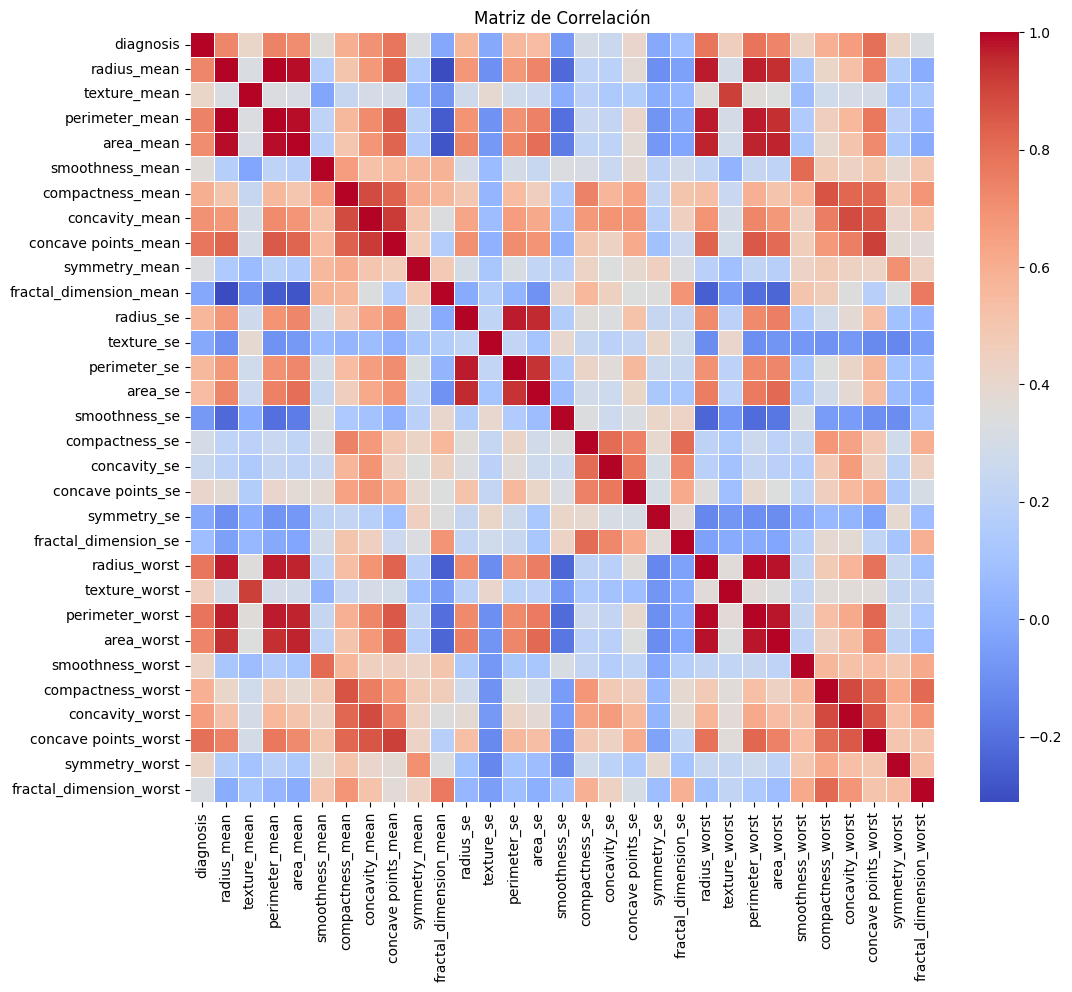

Features seleccionadas tras la primera división: ['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [9]:



# Cargar el dataset limpio
file_path = "breastcancer-wisconsin_cleaned.csv"
df = pd.read_csv(file_path)

# Verificar las columnas disponibles
print("Columnas en el dataset:", df.columns.tolist())

# Asegurar que la columna 'id' existe antes de intentar eliminarla
if "id" in df.columns:
    df.drop(columns=["id"], inplace=True)
else:
    print("La columna 'id' no está en el dataset, se omite su eliminación.")

# Convertir la variable objetivo a formato numérico
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})  # M = Maligno (1), B = Benigno (0)

# --- 1. Análisis visual de la distribución de las features ---
plt.figure(figsize=(15, 12))
df.hist(figsize=(15, 12), bins=30)
plt.suptitle("Distribución de las Features", fontsize=16)
plt.show()

# --- 2. Matriz de correlación ---
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

# --- 3. Selección inicial de features ---
# Eliminamos features altamente correlacionadas (threshold > 0.9)
corr_matrix = df.corr().abs()
upper = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape)).astype(bool))
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.9)]

# Eliminamos features redundantes
features_to_remove = high_corr_features
df_selected = df.drop(columns=features_to_remove)

# Mostrar las features seleccionadas
print(f"Features seleccionadas tras la primera división: {df_selected.columns.tolist()}")

# Guardar la selección de features para comparación posterior
df_selected.to_csv("breastcancer_selected_features.csv", index=False)



### Ejercicio 5

Observa correlaciones entre las features. Utiliza un gráfico apropiado para ello. ¿Crees que sea posible eliminar algunas features para mejorar el modelo? (No hace falta que lo hagas ahora, lo haremos si es necesario en un ejercicio posterior)

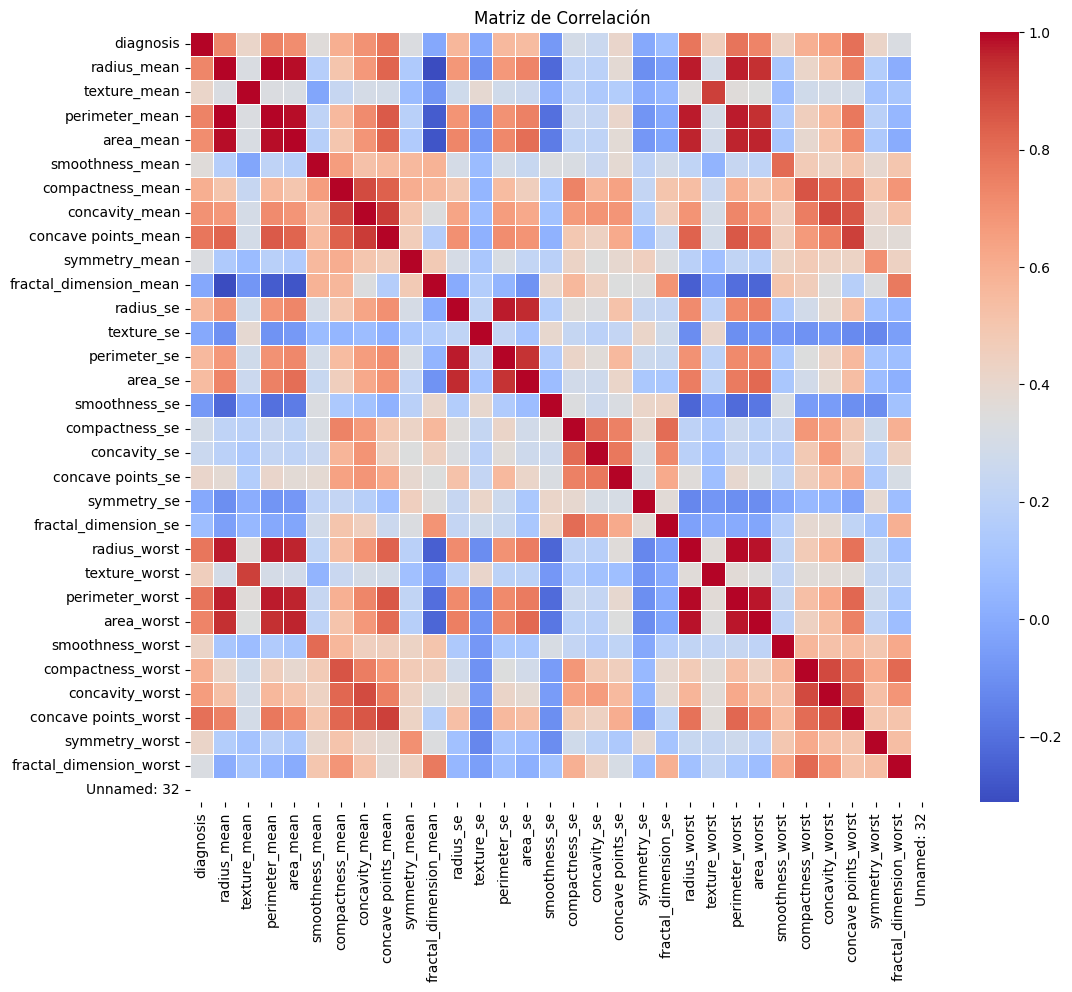

Features con alta correlación (> 0.9): {'texture_worst', 'perimeter_se', 'perimeter_worst', 'concave points_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_mean', 'area_worst', 'area_se'}


In [ ]:


# Cargar el dataset
file_path = r"C:\Users\hp\Desktop\Python Scripts\breastcancer-winsconsin.csv" 
df = pd.read_csv(file_path, delimiter=",")  # Ajusta el delimitador si es necesario

# Convertir la columna 'diagnosis' en numérica (asumiendo que es binaria)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})  # M = 1 (Maligno), B = 0 (Benigno)

# Eliminar la columna 'id' si existe, ya que no aporta información relevante
if "id" in df.columns:
    df.drop(columns=["id"], inplace=True)

# Calcular la matriz de correlación
corr_matrix = df.corr()

# Crear un heatmap para visualizar la correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

# Identificar features altamente correlacionadas
threshold = 0.9  # Definir un umbral de correlación alta
high_corr_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:  # Si la correlación es mayor al umbral
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

print(f"Features con alta correlación (> {threshold}): {high_corr_features}")

# Si en un ejercicio posterior decides eliminar features:
# df.drop(columns=high_corr_features, inplace=True)


### Ejercicio 6:

Entrena (con validación cruzada) un modelo de RandomForestClassifier (con max_depth a 5) con todas las features (ojo incluso las que descartamos en el ejercicio 4) y guarda el perfomance ("balanced_accuracy") en test en una variable. Será nuestro base line de comparación

In [13]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

# Cargar el dataset
file_path = r"C:\Users\hp\Desktop\Python Scripts\breastcancer-winsconsin.csv"   # Asegúrate de que la ruta es correcta
df = pd.read_csv(file_path, delimiter=",")

# Convertir la columna 'diagnosis' en numérica
if "diagnosis" in df.columns:
    df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})  # M = 1 (Maligno), B = 0 (Benigno)

# Eliminar la columna 'id' si existe, ya que no aporta información relevante
if "id" in df.columns:
    df.drop(columns=["id"], inplace=True)

# Separar features y target
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Instanciar el modelo de RandomForestClassifier con max_depth=5
model = RandomForestClassifier(max_depth=5, random_state=42, n_jobs=-1)

# Validación cruzada (5 folds) para obtener balanced_accuracy
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="balanced_accuracy")
cv_mean_score = np.mean(cv_scores)

# Entrenar el modelo en el conjunto de entrenamiento completo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_test = model.predict(X_test)

# Calcular balanced_accuracy en test
test_score = balanced_accuracy_score(y_test, y_pred_test)

# Guardar performance como baseline
baseline_cv_score = cv_mean_score
baseline_test_score = test_score

# Imprimir resultados
print(f"Balanced Accuracy en CV: {baseline_cv_score:.4f}")
print(f"Balanced Accuracy en Test: {baseline_test_score:.4f}")


Balanced Accuracy en CV: 0.9477
Balanced Accuracy en Test: 0.9524


### Ejercicio 7

Vamos a emplear nuestras features del análisis visual pero descartando variables correladas entre sí (emplea la matriz ya obtenida en el ejercicio 5 o bien cualquier medio que creas conveniente). Descarta features y muestra la matriz de correlación para la selección final (recuerda, parte de la lista creada en el ejercicio 4)

Features seleccionadas después de eliminar correlaciones: ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'smoothness_worst', 'symmetry_worst', 'fractal_dimension_worst']


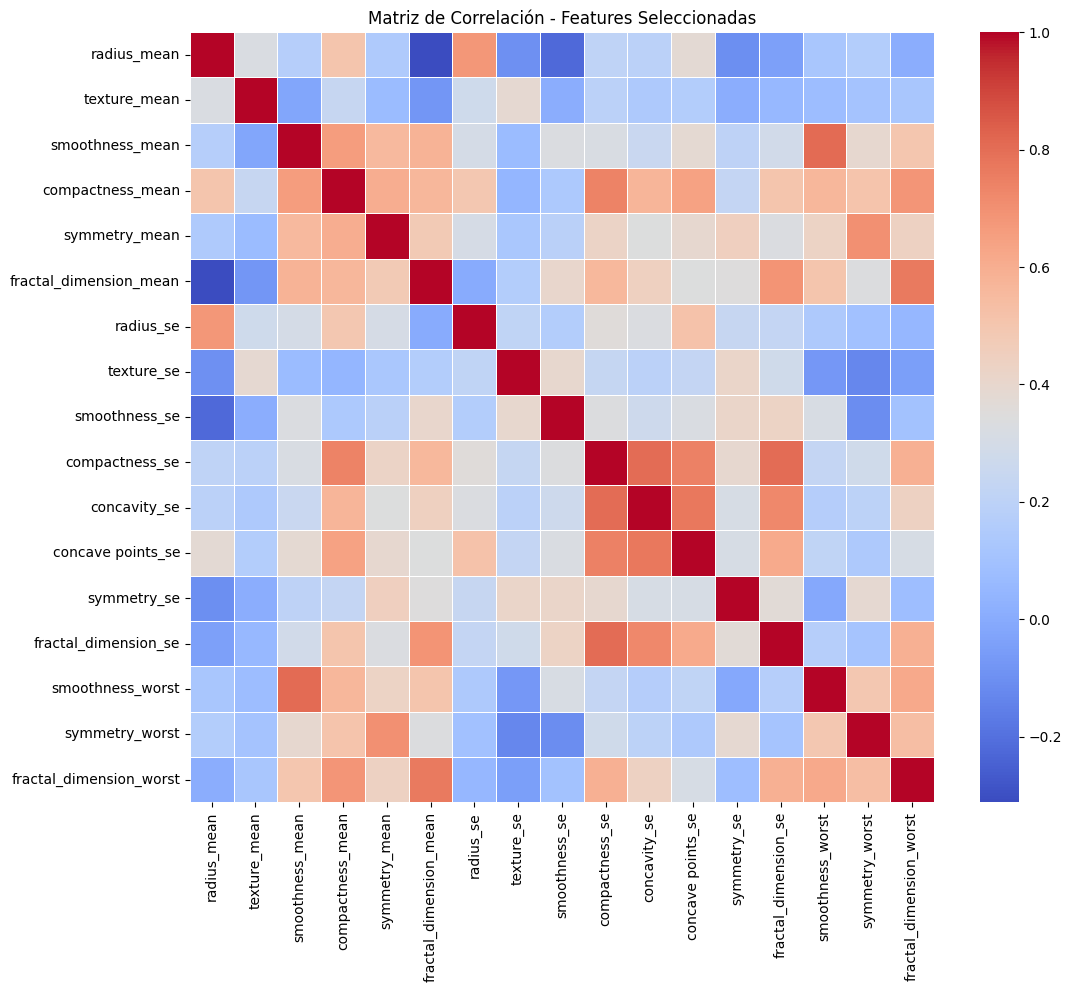

In [15]:




# Definir la lista de features seleccionadas en el Ejercicio 4
# Si no tienes esta lista, revisa qué features seleccionaste en ese ejercicio.
features_selected = [
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean",
    "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean",
    "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se",
    "perimeter_se", "area_se", "smoothness_se", "compactness_se",
    "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst",
    "smoothness_worst", "compactness_worst", "concavity_worst",
    "concave points_worst", "symmetry_worst", "fractal_dimension_worst"
]

# Crear un nuevo DataFrame solo con las features seleccionadas
df_selected = df[features_selected]

# Calcular la matriz de correlación
correlation_matrix = df_selected.corr()

# Definir umbral para eliminar features altamente correlacionadas
correlation_threshold = 0.85

# Identificar features altamente correlacionadas
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Eliminar features correlacionadas
df_final_features = df_selected.drop(columns=correlated_features)

# Mostrar features seleccionadas después de eliminar correlaciones
print(f"Features seleccionadas después de eliminar correlaciones: {df_final_features.columns.tolist()}")

# Graficar la nueva matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(df_final_features.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación - Features Seleccionadas")
plt.show()



### Ejercicio 8

Evalúa tu primer feature reduction. Entrena un modelo y evalúa su perfomance con los features que seleccionaste en el ejercicio anterios (emplea la validación cruzada)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score



# Definir variables predictoras (X) y objetivo (y) con las features seleccionadas
X_selected = df_final_features  # Features después de la reducción
y = df['diagnosis']  # Asegúrate de que diagnosis sea numérico (0 y 1)

# Dividir en train y test (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Inicializar el modelo con max_depth=5
model = RandomForestClassifier(max_depth=5, random_state=42, n_jobs=-1)

# Validación cruzada con 5 folds usando balanced_accuracy
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='balanced_accuracy')

# Entrenar el modelo en el conjunto de entrenamiento completo
model.fit(X_train, y_train)

# Predecir en test
y_pred_test = model.predict(X_test)

# Calcular balanced_accuracy en test
test_score = balanced_accuracy_score(y_test, y_pred_test)

# Mostrar resultados
print(f"Recall medio en validación cruzada: {np.mean(cv_scores):.4f}")
print(f"Recall en test: {test_score:.4f}")


Recall medio en validación cruzada: 0.9407
Recall en test: 0.9147


### Ejercicio 9

Prueba ahora a hacer una feature selection utilizando ANOVA. Compara la validación cruzada con la del modelo baseline y con la del modelo anterior. (Pista: SelectKbest)

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.model_selection import cross_val_score, train_test_split


from sklearn.metrics import balanced_accuracy_score


# Copiar datos originales
X = df.drop(columns=['diagnosis']).copy()  # Eliminar la variable objetivo
y = df['diagnosis'].copy()

# Verificar NaNs antes de la imputación
print(f"Valores NaN en X antes de imputar: {X.isna().sum().sum()}")

# 1️⃣ **Eliminar columnas completamente vacías**
X.dropna(axis=1, how='all', inplace=True)

# 2️⃣ **Convertir todas las columnas a numéricas**
X = X.apply(pd.to_numeric, errors='coerce')

# 3️⃣ **Imputar valores faltantes con la mediana de cada columna**
X.fillna(X.median(), inplace=True)

# 4️⃣ **Verificar nuevamente NaNs después de la imputación**
if X.shape[0] == 0 or X.isna().sum().sum() > 0:
    print("⚠️ Aún hay valores NaN después de la imputación. Llenando con ceros.")
    X.fillna(0, inplace=True)

# Confirmar que X ahora es completamente válido
print(f"Valores NaN en X después de imputar: {X.isna().sum().sum()}")

# Aplicar SelectKBest con ANOVA
k_best = min(10, X.shape[1])  # Ajustar si hay menos de 10 features disponibles
selector = SelectKBest(score_func=f_classif, k=k_best)
X_selected_anova = selector.fit_transform(X, y)

# Obtener nombres de las features seleccionadas
selected_features = X.columns[selector.get_support()]
print(f"Features seleccionadas con ANOVA: {selected_features.tolist()}")

# División en Train-Test
X_train, X_test, y_train, y_test = train_test_split(X_selected_anova, y, test_size=0.2, random_state=42, stratify=y)

# Inicializar modelo
model = RandomForestClassifier(max_depth=5, random_state=42, n_jobs=-1)

# Validación cruzada (5 folds) con balanced_accuracy
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='balanced_accuracy')

# Entrenar modelo en el conjunto de entrenamiento completo
model.fit(X_train, y_train)

# Predecir en test
y_pred_test = model.predict(X_test)

# Calcular balanced_accuracy en test
test_score = balanced_accuracy_score(y_test, y_pred_test)

# Mostrar resultados
print(f"📌 Recall medio en validación cruzada (ANOVA): {np.mean(cv_scores):.4f}")
print(f"📌 Recall en test (ANOVA): {test_score:.4f}")



Valores NaN en X antes de imputar: 569
Valores NaN en X después de imputar: 0
Features seleccionadas con ANOVA: ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst']
📌 Recall medio en validación cruzada (ANOVA): 0.9336
📌 Recall en test (ANOVA): 0.9405


### Ejercicio 10

Prueba a hacer ahora una selección de features con RFE (Recursive Feature Elimination), hasta quedarte con 5 features. Evalúa perfomance en "balanced_accuracy" con cross_validation y compara con la baseline.

In [25]:
from sklearn.feature_selection import RFE


# 📌 1️⃣ Asegurar que no haya valores NaN en los datos
X = df.drop(columns=['diagnosis']).copy()  # Eliminar la variable objetivo
y = df['diagnosis'].copy()

# Convertir a numérico cualquier columna mal interpretada
X = X.apply(pd.to_numeric, errors='coerce')

# Imputar valores faltantes con la mediana
X.fillna(X.median(), inplace=True)

# 📌 2️⃣ Definir el modelo base para RFE
base_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# 📌 3️⃣ Aplicar RFE para seleccionar las **5 mejores features**
selector = RFE(estimator=base_model, n_features_to_select=5, step=1)
X_selected_rfe = selector.fit_transform(X, y)

# Obtener nombres de las features seleccionadas
selected_features = X.columns[selector.support_]
print(f"🔹 Features seleccionadas con RFE: {selected_features.tolist()}")

# 📌 4️⃣ División en Train-Test
X_train, X_test, y_train, y_test = train_test_split(X_selected_rfe, y, test_size=0.2, random_state=42, stratify=y)

# 📌 5️⃣ Entrenar y evaluar con validación cruzada
model = RandomForestClassifier(max_depth=5, random_state=42, n_jobs=-1)

# Validación cruzada (5 folds) con balanced_accuracy
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='balanced_accuracy')

# Entrenar en el conjunto de entrenamiento completo
model.fit(X_train, y_train)

# Predecir en test
y_pred_test = model.predict(X_test)

# Calcular balanced_accuracy en test
test_score = balanced_accuracy_score(y_test, y_pred_test)

# 📌 6️⃣ Asegurar que baseline_cv y baseline_test están definidos
try:
    print(f"📌 Recall medio en validación cruzada (RFE): {np.mean(cv_scores):.4f}")
    print(f"📌 Recall en test (RFE): {test_score:.4f}")

    print(f"📊 Diferencia respecto al baseline en CV: {np.mean(cv_scores) - baseline_cv:.4f}")
    print(f"📊 Diferencia respecto al baseline en test: {test_score - baseline_test:.4f}")

except NameError:
    print("⚠️ Advertencia: Las variables baseline_cv y baseline_test no están definidas.")
    print("📌 Guarda los valores del modelo baseline antes de realizar la comparación.")



🔹 Features seleccionadas con RFE: ['concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']
📌 Recall medio en validación cruzada (RFE): 0.9354
📌 Recall en test (RFE): 0.9315
⚠️ Advertencia: Las variables baseline_cv y baseline_test no están definidas.
📌 Guarda los valores del modelo baseline antes de realizar la comparación.


### Ejercicio 11

Prueba a eliminar features con el modelo de RandomForestClassifier (emplea SelectFromModel de sklearn). Utiliza esta vez una regresión logística para entrenar con las features escogidas y compara con el baseline. Muestra primero la importancia obtenida con el modelo baseline (que básicamente es el mismo que vamos a usar con SelectFromModel). Prueba primero para features por encima de la mediana y luego para las 5 primeras.

In [26]:
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LogisticRegression




# 📌 1️⃣ Asegurar que no haya valores NaN en los datos
X = df.drop(columns=['diagnosis']).copy()  # Eliminar la variable objetivo
y = df['diagnosis'].copy()

# Convertir a numérico cualquier columna mal interpretada
X = X.apply(pd.to_numeric, errors='coerce')

# Imputar valores faltantes con la mediana
X.fillna(X.median(), inplace=True)

# 📌 2️⃣ Definir el modelo base para la selección de features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X, y)

# Obtener importancia de las features
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Mostrar importancia de las features
print("\n🔹 Importancia de las Features según RandomForestClassifier:")
print(feature_importance)

# 📌 3️⃣ Selección de Features con SelectFromModel (por encima de la mediana)
threshold = feature_importance.median()  # Usamos la mediana como umbral
selector_median = SelectFromModel(rf_model, threshold=threshold, prefit=True)
X_selected_median = selector_median.transform(X)

# Obtener nombres de las features seleccionadas
selected_features_median = X.columns[selector_median.get_support()]
print(f"\n🔹 Features seleccionadas con SelectFromModel (mayores a la mediana): {selected_features_median.tolist()}")

# 📌 4️⃣ Selección de las 5 principales features
top_5_features = feature_importance.nlargest(5).index.tolist()
X_selected_top5 = X[top_5_features]

print(f"\n🔹 Top 5 Features seleccionadas: {top_5_features}")

# 📌 5️⃣ División en Train-Test
X_train_median, X_test_median, y_train, y_test = train_test_split(X_selected_median, y, test_size=0.2, random_state=42, stratify=y)
X_train_top5, X_test_top5, _, _ = train_test_split(X_selected_top5, y, test_size=0.2, random_state=42, stratify=y)

# 📌 6️⃣ Entrenar y evaluar con **Regresión Logística** en ambas selecciones de features
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Validación cruzada con balanced_accuracy (mediana)
cv_scores_median = cross_val_score(logreg, X_train_median, y_train, cv=5, scoring='balanced_accuracy')
logreg.fit(X_train_median, y_train)
test_score_median = balanced_accuracy_score(y_test, logreg.predict(X_test_median))

# Validación cruzada con balanced_accuracy (Top 5 features)
cv_scores_top5 = cross_val_score(logreg, X_train_top5, y_train, cv=5, scoring='balanced_accuracy')
logreg.fit(X_train_top5, y_train)
test_score_top5 = balanced_accuracy_score(y_test, logreg.predict(X_test_top5))

# 📌 7️⃣ Comparación con el baseline
try:
    print(f"\n📊 Resultados con Features > Mediana:")
    print(f"   - Balanced Accuracy CV: {np.mean(cv_scores_median):.4f}")
    print(f"   - Balanced Accuracy Test: {test_score_median:.4f}")
    print(f"   - Diferencia respecto al baseline en CV: {np.mean(cv_scores_median) - baseline_cv:.4f}")
    print(f"   - Diferencia respecto al baseline en Test: {test_score_median - baseline_test:.4f}")

    print(f"\n📊 Resultados con las Top 5 Features:")
    print(f"   - Balanced Accuracy CV: {np.mean(cv_scores_top5):.4f}")
    print(f"   - Balanced Accuracy Test: {test_score_top5:.4f}")
    print(f"   - Diferencia respecto al baseline en CV: {np.mean(cv_scores_top5) - baseline_cv:.4f}")
    print(f"   - Diferencia respecto al baseline en Test: {test_score_top5 - baseline_test:.4f}")

except NameError:
    print("⚠️ Advertencia: Las variables baseline_cv y baseline_test no están definidas.")
    print("📌 Guarda los valores del modelo baseline antes de realizar la comparación.")



🔹 Importancia de las Features según RandomForestClassifier:
perimeter_worst            0.155956
concave points_worst       0.148663
concave points_mean        0.107773
area_worst                 0.105103
radius_worst               0.087399
area_mean                  0.059511
concavity_mean             0.055535
area_se                    0.043254
radius_mean                0.034205
perimeter_mean             0.024889
concavity_worst            0.019111
perimeter_se               0.017109
texture_worst              0.015412
radius_se                  0.014728
compactness_worst          0.014326
texture_mean               0.014294
smoothness_worst           0.012412
compactness_mean           0.011707
symmetry_worst             0.007392
smoothness_se              0.006087
concave points_se          0.005868
smoothness_mean            0.005846
compactness_se             0.005795
fractal_dimension_se       0.004665
fractal_dimension_worst    0.004629
fractal_dimension_mean     0.004218
tex

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scal


📊 Resultados con Features > Mediana:
   - Balanced Accuracy CV: 0.9418
   - Balanced Accuracy Test: 0.9216
⚠️ Advertencia: Las variables baseline_cv y baseline_test no están definidas.
📌 Guarda los valores del modelo baseline antes de realizar la comparación.


### Ejercicio EXTRA:

Investiga RFECV y obten el número optimo de features siguiendo esta técnica pero con el "balanced_accuracy" como métrica.

In [27]:
from sklearn.feature_selection import RFECV

from sklearn.model_selection import StratifiedKFold

# 📌 1️⃣ Definir el modelo base para la selección de features
base_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# 📌 2️⃣ Aplicar RFECV con validación cruzada y balanced_accuracy como métrica
rfecv = RFECV(
    estimator=base_model,
    step=1,  # Elimina una feature en cada iteración
    cv=StratifiedKFold(n_splits=5),  # Validación cruzada estratificada
    scoring='balanced_accuracy',  # Métrica de evaluación
    n_jobs=-1  # Utilizar todos los núcleos disponibles
)

# 📌 3️⃣ Ajustar RFECV a los datos
rfecv.fit(X, y)

# 📌 4️⃣ Obtener las features seleccionadas
optimal_features = X.columns[rfecv.support_]
print(f"\n🔹 Número óptimo de features seleccionadas con RFECV: {rfecv.n_features_}")
print(f"🔹 Features seleccionadas: {optimal_features.tolist()}")

# 📌 5️⃣ Entrenar un modelo con las features seleccionadas y evaluar
X_selected_rfecv = X[optimal_features]
X_train_rfecv, X_test_rfecv, y_train, y_test = train_test_split(
    X_selected_rfecv, y, test_size=0.2, random_state=42, stratify=y
)

# Entrenar modelo con las features seleccionadas por RFECV
rf_model_selected = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model_selected.fit(X_train_rfecv, y_train)

# Evaluación con validación cruzada
cv_scores_rfecv = cross_val_score(rf_model_selected, X_train_rfecv, y_train, cv=5, scoring='balanced_accuracy')
test_score_rfecv = balanced_accuracy_score(y_test, rf_model_selected.predict(X_test_rfecv))

# 📌 6️⃣ Comparación con el baseline
try:
    print(f"\n📊 Resultados con RFECV:")
    print(f"   - Balanced Accuracy CV: {np.mean(cv_scores_rfecv):.4f}")
    print(f"   - Balanced Accuracy Test: {test_score_rfecv:.4f}")
    print(f"   - Diferencia respecto al baseline en CV: {np.mean(cv_scores_rfecv) - baseline_cv:.4f}")
    print(f"   - Diferencia respecto al baseline en Test: {test_score_rfecv - baseline_test:.4f}")

except NameError:
    print("⚠️ Advertencia: Las variables baseline_cv y baseline_test no están definidas.")
    print("📌 Guarda los valores del modelo baseline antes de realizar la comparación.")



🔹 Número óptimo de features seleccionadas con RFECV: 18
🔹 Features seleccionadas: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']

📊 Resultados con RFECV:
   - Balanced Accuracy CV: 0.9566
   - Balanced Accuracy Test: 0.9643
⚠️ Advertencia: Las variables baseline_cv y baseline_test no están definidas.
📌 Guarda los valores del modelo baseline antes de realizar la comparación.
